In [66]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
db = pd.read_csv("Coursera comments.csv")

In [6]:
db =db.drop(columns = ['Unnamed: 0'])
db.head()

,25 comments,Course title,Description,Number of reviews,Rating
0,or GamificationFilled StarFilled StarFilled St...,Gamification,Gamification is the application of game elemen...,"1,996",4.8
1,r Dealing With Missing DataFilled StarFilled S...,Dealing With Missing Data,This course will cover the steps used in weigh...,89,3.8
2,r Unordered Data StructuresFilled StarFilled S...,Unordered Data Structures,The Unordered Data Structures course covers th...,81,4.9
3,or Vital Signs: Understanding What the Body Is...,Vital Signs: Understanding What the Body Is Te...,"The vital signs – heart rate, blood pressure, ...","2,212",4.8
4,FinTech Disruptive Innovation: Implications fo...,FinTech Disruptive Innovation: Implications fo...,This course “FinTech Disruptive Innovation: Im...,20,4.5


In [29]:
nset = []
db['Len Comments'] = db['25 comments']
db['Words in comments'] = db['25 comments']
db['TB Comments'] = db['25 comments']
db['Comment sentiment'] = db['25 comments']
for i,s in enumerate(db['25 comments']):
    db['TB Comments'].loc[i] = TextBlob(s)
    nset.append([s for s in db['TB Comments'].loc[i].noun_phrases])
    db['Comment sentiment'].loc[i] = db['TB Comments'].loc[i].sentiment.polarity

In [39]:
# nset.add(s for s in list(db['TB Comments'].loc[0].noun_phrases))
len(db[db['Comment sentiment']<0])

3

In [50]:
db = db.sort_values('Comment sentiment', ascending=False)
# db.nlargest(3, 'Comment sentiment')
# type(db['Comment sentiment'][0])
db

,25 comments,Course title,Description,Number of reviews,Rating,TB Comments,Len Comments,Words in comments,Comment sentiment
117,r Desenvolvendo sua musicalidadeFilled StarFil...,Desenvolvendo sua musicalidade,Aprenda os conceitos e abordagens básicos nece...,23,5.0,"(r, , D, e, s, e, n, v, o, l, v, e, n, d, o, ...",r Desenvolvendo sua musicalidadeFilled StarFil...,r Desenvolvendo sua musicalidadeFilled StarFil...,0.496875
240,r Mechanics of Materials III: Beam BendingFill...,Mechanics of Materials III: Beam Bending,This course explores the analysis and design o...,272,4.9,"(r, , M, e, c, h, a, n, i, c, s, , o, f, , ...",r Mechanics of Materials III: Beam BendingFill...,r Mechanics of Materials III: Beam BendingFill...,0.481894
969,On Premises Capacity Upgrade and Monitoring wi...,On Premises Capacity Upgrade and Monitoring wi...,This course helps you build understanding on k...,62,4.7,"(O, n, , P, r, e, m, i, s, e, s, , C, a, p, ...",On Premises Capacity Upgrade and Monitoring wi...,On Premises Capacity Upgrade and Monitoring wi...,0.475641
3,or Vital Signs: Understanding What the Body Is...,Vital Signs: Understanding What the Body Is Te...,"The vital signs – heart rate, blood pressure, ...","2,212",4.8,"(o, r, , V, i, t, a, l, , S, i, g, n, s, :, ...",or Vital Signs: Understanding What the Body Is...,or Vital Signs: Understanding What the Body Is...,0.475154
610,or Negociações de sucesso: estratégias e habil...,Negociações de sucesso: estratégias e habilida...,Todos nós negociamos diariamente. No nível pes...,"1,004",4.9,"(o, r, , N, e, g, o, c, i, a, ç, õ, e, s, , ...",or Negociações de sucesso: estratégias e habil...,or Negociações de sucesso: estratégias e habil...,0.475
...,...,...,...,...,...,...,...,...,...
639,for Open Source tools for Data ScienceFilled ...,Open Source tools for Data Science,What are some of the most popular data science...,"11,130",4.6,"( , f, o, r, , O, p, e, n, , S, o, u, r, c, ...",for Open Source tools for Data ScienceFilled ...,for Open Source tools for Data ScienceFilled ...,0.00592646
1157,or ¡¿Cómo?! ¿Química en mi casa?Filled StarFil...,¡¿Cómo?! ¿Química en mi casa?,"En este curso, el participante conocerá una bu...","1,075",4.8,"(o, r, , ¡, ¿, C, ó, m, o, ?, !, , ¿, Q, u, ...",or ¡¿Cómo?! ¿Química en mi casa?Filled StarFil...,or ¡¿Cómo?! ¿Química en mi casa?Filled StarFil...,0
792,Innovation: From Creativity to Entrepreneurshi...,Innovation: From Creativity to Entrepreneurshi...,The capstone for the specialization will provi...,14,4.3,"(I, n, n, o, v, a, t, i, o, n, :, , F, r, o, ...",Innovation: From Creativity to Entrepreneurshi...,Innovation: From Creativity to Entrepreneurshi...,-0.0277327
457,Startup Valuation MethodsFilled StarFilled Sta...,Startup Valuation Methods,How do different types of investors think abou...,NaN,NaN,"(S, t, a, r, t, u, p, , V, a, l, u, a, t, i, ...",Startup Valuation MethodsFilled StarFilled Sta...,Startup Valuation MethodsFilled StarFilled Sta...,-0.0280449


In [53]:
# db.head(10).to_csv("Top comments.csv")

In [54]:
dbtop = db.head(10)['25 comments']

In [63]:
l = dbtop.tolist()
# ' '.join(dbtop.tolist()))
s =' '.join(l)

In [65]:
type(s)

str

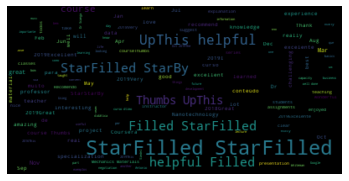

In [68]:
wordcloud = WordCloud().generate(s)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
stoplist =['StarFilled','helpful','Filled','StarBy','UpThis']
s.replace(stoplist,'')
# s.replace('helpful','')

TypeError: replace() argument 1 must be str, not list

In [114]:
stop_words = set(['The,''made','planning','Thumbs','English','MANIVEL','Teacher','Thank','the', 'and', 'a' ,'an','StarFilled','helpful','Filled','StarBy', 'UpThis','Jan','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# sub_stopwords = set(TextBlob(s).words) - stop_words

In [88]:
wc_str=' '
for word in sub_stopwords:
    wc_str=wc_str + word +' '
print(wc_str)

 made 2019Sensacional get The 3 04 style online most Maicon 2018interestingThumbs fazer B•Jun pra Gerardo access sempre L•Dec planning Fernando She any Victor L 2019Excelente V 2016good Ivan sharing much learning 2017Excellent down opportunity 2018Excellent per Capstone amit here.Thumbs reais pleased todos.Att.Adriano Wish interested M Responsive Curso am T•Jan that.Thumbs informationThumbs Jafed approach 2019Great exemplificações achando StructuresFilled Unordered keep N•Aug management through L•Sep balance Abigail Brazil tutor porém EAD qualquer camilo 2019Really www.linkedin.com/in/joseantonio11 create forces sure Amar v day-to-day do next Ping provided atenção desenvolver 2017Today ferramentas 21 money entre agregar been community 2016My Amaefula Christine M•Apr 2017Spontaneously several 2016You rewarding problems greatest operational melhor right 2017good 2019maravilhosoThumbs agradeço objetivas assuntos.Thumbs Your F•Apr 17 2016No included usual credit s•Aug program monitoring fo

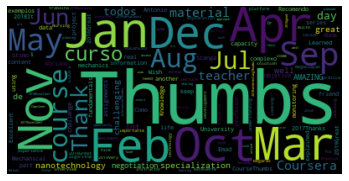

In [90]:
wordcloud = WordCloud().generate(wc_str)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [119]:
stop_words = set(['The','made','planning','Thumbs','English','MANIVEL','Teacher','Thank','the', 'and', 'a' ,'an','StarFilled','helpful','Filled','StarBy', 'UpThis','Jan','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
sets = set(TextBlob(s).words)
for el in stop_words:
    if el in sets:
        sets.remove(el)
sets

{'2019Sensacional',
 'most',
 'pra',
 'Gerardo',
 'sempre',
 'L•Dec',
 'Fernando',
 'She',
 'L',
 'Ivan',
 'sharing',
 '2017Excellent',
 'down',
 'opportunity',
 'per',
 'amit',
 'here.Thumbs',
 'pleased',
 'todos.Att.Adriano',
 'Wish',
 'Responsive',
 'Curso',
 'am',
 'that.Thumbs',
 'informationThumbs',
 'Jafed',
 '2019Great',
 'exemplificações',
 'achando',
 'StructuresFilled',
 'Unordered',
 'keep',
 'N•Aug',
 'management',
 'through',
 'L•Sep',
 'Abigail',
 'Brazil',
 'porém',
 'EAD',
 'qualquer',
 'www.linkedin.com/in/joseantonio11',
 'forces',
 'sure',
 'Amar',
 'desenvolver',
 'money',
 'been',
 'community',
 'Christine',
 '2017Spontaneously',
 'several',
 'greatest',
 'operational',
 '2017good',
 'assuntos.Thumbs',
 '17',
 '2016No',
 'included',
 'usual',
 'credit',
 'forward',
 'nanotechnology.Thanks',
 'them',
 'o',
 'Patrícia',
 'Nicolas',
 'But',
 'Thomas',
 '2019An',
 'T',
 'please',
 'C',
 'D•Sep',
 'L•Nov',
 'out',
 'Estimula',
 'Manoel',
 'Vaibhav',
 'Pelayo.Thumbs',
 

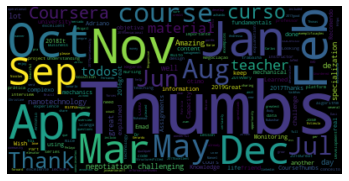

In [125]:
wc_str=' '
for w in sets:
    wc_str=wc_str + w +' '
# print(wc_str)


In [ ]:
wordcloud = WordCloud().generate(wc_str)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [133]:
TextBlob(wc_str).noun_phrases

WordList(['gerardo', 'l•dec fernando', 'ivan', 'amit here.thumbs', 'responsive curso', 'that.thumbs informationthumbs', 'jafed', '2019great exemplificações achando', 'structuresfilled unordered', 'n•aug', 'l•sep abigail brazil', 'ead', 'qualquer www.linkedin.com/in/joseantonio11 forces', 'amar', 'desenvolver money', 'christine', 'operational 2017good assuntos.thumbs', 'usual credit', 'patrícia nicolas', 'thomas', 'd•sep l•nov', 'estimula manoel vaibhav pelayo.thumbs', 'muhammad', 'body', 'beautiful negociar', 'muitos k•jul w•oct', 'mechanics que life real-life incluso', 'davi', "2017thanks 'm", 'h•nov', 'm•nov', 'mubashar', 'carlos', 'será https', 'learned g•jan', 'elevator manner p•aug', 'abiram k•dec andressa', 'courses extremamente', 'aprendizado tomarlo mercado.thumbs', 'merci', 'new conocimientos', 'marie-ange c•nov well', 'apresentado teachers bom', 'coursera.thumbs', 'interesting complexo', 'a•feb', '2018yes fundamentals.thumbs', 'português', 'worth friend', 'prévia 2017one irá 

In [110]:
# language set
language = {'English', 'French', 'German'}

# 'German' element is removed
language.remove('German')

# Updated language set
print('Updated language set: ', language)

Updated language set:  {'English', 'French'}


In [129]:
sets



{'2019Sensacional',
 'most',
 'pra',
 'Gerardo',
 'sempre',
 'L•Dec',
 'Fernando',
 'She',
 'L',
 'Ivan',
 'sharing',
 '2017Excellent',
 'down',
 'opportunity',
 'per',
 'amit',
 'here.Thumbs',
 'pleased',
 'todos.Att.Adriano',
 'Wish',
 'Responsive',
 'Curso',
 'am',
 'that.Thumbs',
 'informationThumbs',
 'Jafed',
 '2019Great',
 'exemplificações',
 'achando',
 'StructuresFilled',
 'Unordered',
 'keep',
 'N•Aug',
 'management',
 'through',
 'L•Sep',
 'Abigail',
 'Brazil',
 'porém',
 'EAD',
 'qualquer',
 'www.linkedin.com/in/joseantonio11',
 'forces',
 'sure',
 'Amar',
 'desenvolver',
 'money',
 'been',
 'community',
 'Christine',
 '2017Spontaneously',
 'several',
 'greatest',
 'operational',
 '2017good',
 'assuntos.Thumbs',
 '17',
 '2016No',
 'included',
 'usual',
 'credit',
 'forward',
 'nanotechnology.Thanks',
 'them',
 'o',
 'Patrícia',
 'Nicolas',
 'But',
 'Thomas',
 '2019An',
 'T',
 'please',
 'C',
 'D•Sep',
 'L•Nov',
 'out',
 'Estimula',
 'Manoel',
 'Vaibhav',
 'Pelayo.Thumbs',
 